In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import chi2, RFECV, RFE
from sklearn.decomposition import PCA 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer, roc_auc_score, mean_squared_error
from sklearn.svm import SVC


In [575]:
df = pd.read_csv(r"C:\Users\furkanbaba\Desktop\furkanbaba\coding\hotel-booking\data\data_hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [576]:
df.shape

(119390, 32)

In [577]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## DATA CLEANING

In [579]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [580]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [581]:
df = df.drop('company', axis=1)
df.dropna(axis=0, inplace=True)

In [582]:
df.duplicated().sum()

27823

In [583]:
df.drop_duplicates(inplace=True)

In [584]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [585]:
(df.select_dtypes(include=['int64','float64'])<0).sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [586]:
df = df[df['adr']>=0]

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75070 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75070 non-null  object 
 1   is_canceled                     75070 non-null  int64  
 2   lead_time                       75070 non-null  int64  
 3   arrival_date_year               75070 non-null  int64  
 4   arrival_date_month              75070 non-null  object 
 5   arrival_date_week_number        75070 non-null  int64  
 6   arrival_date_day_of_month       75070 non-null  int64  
 7   stays_in_weekend_nights         75070 non-null  int64  
 8   stays_in_week_nights            75070 non-null  int64  
 9   adults                          75070 non-null  int64  
 10  children                        75070 non-null  float64
 11  babies                          75070 non-null  int64  
 12  meal                            7507

In [588]:
# the three columns cannot be zero at the same row
check = (df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)
df[check]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
32029,Resort Hotel,0,4,2017,January,2,14,0,1,0,...,0,No Deposit,168.0,0,Transient-Party,0.00,0,0,Check-Out,2017-01-15
40392,City Hotel,0,132,2015,July,30,23,2,5,0,...,4,No Deposit,1.0,0,Transient-Party,0.00,0,0,Check-Out,2015-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114583,City Hotel,0,26,2017,June,25,19,1,4,0,...,2,No Deposit,9.0,0,Transient,90.00,0,1,Check-Out,2017-06-24
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [589]:
index = df[(df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)].index
df.drop(index , inplace=True)

In [590]:
df.reset_index(drop=True, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
2,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22


In [591]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          475
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                29
adults                               6
children                             5
babies                               5
meal                                 5
country                            174
market_segment                       7
distribution_channel                 4
is_repeated_guest                    2
previous_cancellations              13
previous_bookings_not_canceled      27
reserved_room_type                   8
assigned_room_type                  10
booking_changes                     19
deposit_type                         3
agent                              332
days_in_waiting_list               121
customer_type            

In [592]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].replace(month_mapping)

In [593]:
df[['arrival_date_year','arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1


In [594]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'].head()

0    2015-7-1
1    2015-7-1
2    2015-7-1
3    2015-7-1
4    2015-7-1
Name: arrival_date, dtype: object

In [595]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'].head()

0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: total_guests, dtype: float64

In [596]:
df[['arrival_date', 'total_guests']].head()

,arrival_date,total_guests
0,2015-7-1,1.0
1,2015-7-1,2.0
2,2015-7-1,2.0
3,2015-7-1,2.0
4,2015-7-1,2.0


In [597]:
df.groupby('arrival_date')['total_guests'].sum().head().sort_values(ascending=False)

arrival_date
2015-10-10    193.0
2015-10-12    152.0
2015-10-1     145.0
2015-10-11    123.0
2015-10-13    102.0
Name: total_guests, dtype: float64

In [598]:
# create a dataset that includes only the rows which are not cancelled
not_cancelled = df[df['is_canceled'] == 0]
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests
0,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1,1.0
1,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1,2.0
2,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-7-1,2.0
6,Resort Hotel,0,35,2015,7,27,1,0,4,2,...,240.0,0,Transient,145.0,0,0,Check-Out,2015-07-05,2015-7-1,2.0
7,Resort Hotel,0,68,2015,7,27,1,0,4,2,...,240.0,0,Transient,97.0,0,3,Check-Out,2015-07-05,2015-7-1,2.0


In [599]:
country_wise = not_cancelled['country'].value_counts().reset_index()
country_wise.columns = ['country', 'no_of_guests']
country_wise

,country,no_of_guests
0,PRT,11185
1,GBR,7587
2,FRA,6600
3,ESP,4856
4,DEU,4102
...,...,...
157,MKD,1
158,BHR,1
159,NPL,1
160,SYC,1


In [600]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52501 entries, 0 to 74955
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           52501 non-null  object 
 1   is_canceled                     52501 non-null  int64  
 2   lead_time                       52501 non-null  int64  
 3   arrival_date_year               52501 non-null  int64  
 4   arrival_date_month              52501 non-null  int64  
 5   arrival_date_week_number        52501 non-null  int64  
 6   arrival_date_day_of_month       52501 non-null  int64  
 7   stays_in_weekend_nights         52501 non-null  int64  
 8   stays_in_week_nights            52501 non-null  int64  
 9   adults                          52501 non-null  int64  
 10  children                        52501 non-null  float64
 11  babies                          52501 non-null  int64  
 12  meal                            52501

In [601]:
not_cancelled.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
count,52501.0,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,...,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000,52501.000000
mean,0.0,77.412564,2016.184949,6.504943,26.972439,15.778233,1.042685,2.662616,1.908268,0.129007,...,0.018076,0.006667,0.045999,0.283861,97.208701,0.812575,106.323992,0.103103,0.821051,2.049390
std,0.0,81.612266,0.689792,3.075786,13.556479,8.816527,1.009567,1.975164,0.477258,0.435502,...,0.133227,0.245091,0.603765,0.730566,114.079003,10.440505,50.069753,0.305907,0.849109,0.661987
min,0.0,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.740000,0.000000,0.000000,2.000000
50%,0.0,49.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,98.000000,0.000000,1.000000,2.000000
75%,0.0,120.000000,2017.000000,9.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,132.600000,0.000000,1.000000,2.000000
max,0.0,542.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,40.000000,4.000000,3.000000,...,1.000000,11.000000,50.000000,18.000000,535.000000,379.000000,510.000000,3.000000,5.000000,12.000000


In [602]:
guests_arrival = not_cancelled.groupby('arrival_date')['total_guests'].sum()
guests_arrival.head().sort_values(ascending=False)

arrival_date
2015-10-10    157.0
2015-10-12    138.0
2015-10-1     128.0
2015-10-11    102.0
2015-10-13     91.0
Name: total_guests, dtype: float64

## Exploratory Data Analysis

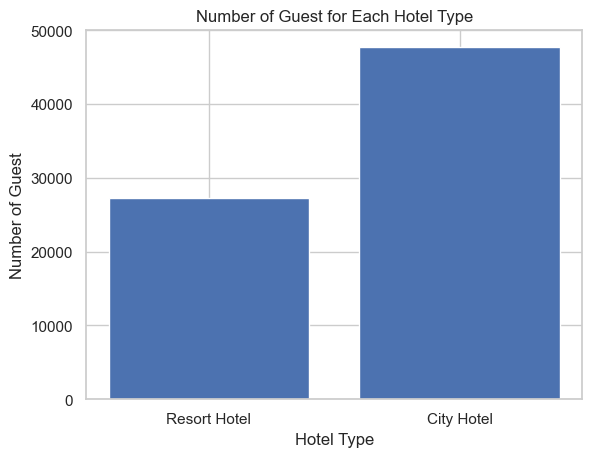

In [603]:
resort_len= len(df[df['hotel']=='Resort Hotel'])
city_len=len(df[df['hotel']=='City Hotel'])

hotel_types = ['Resort Hotel', 'City Hotel']
lengths = [resort_len, city_len]

plt.bar(hotel_types, lengths)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guest')
plt.title('Number of Guest for Each Hotel Type')
plt.show()

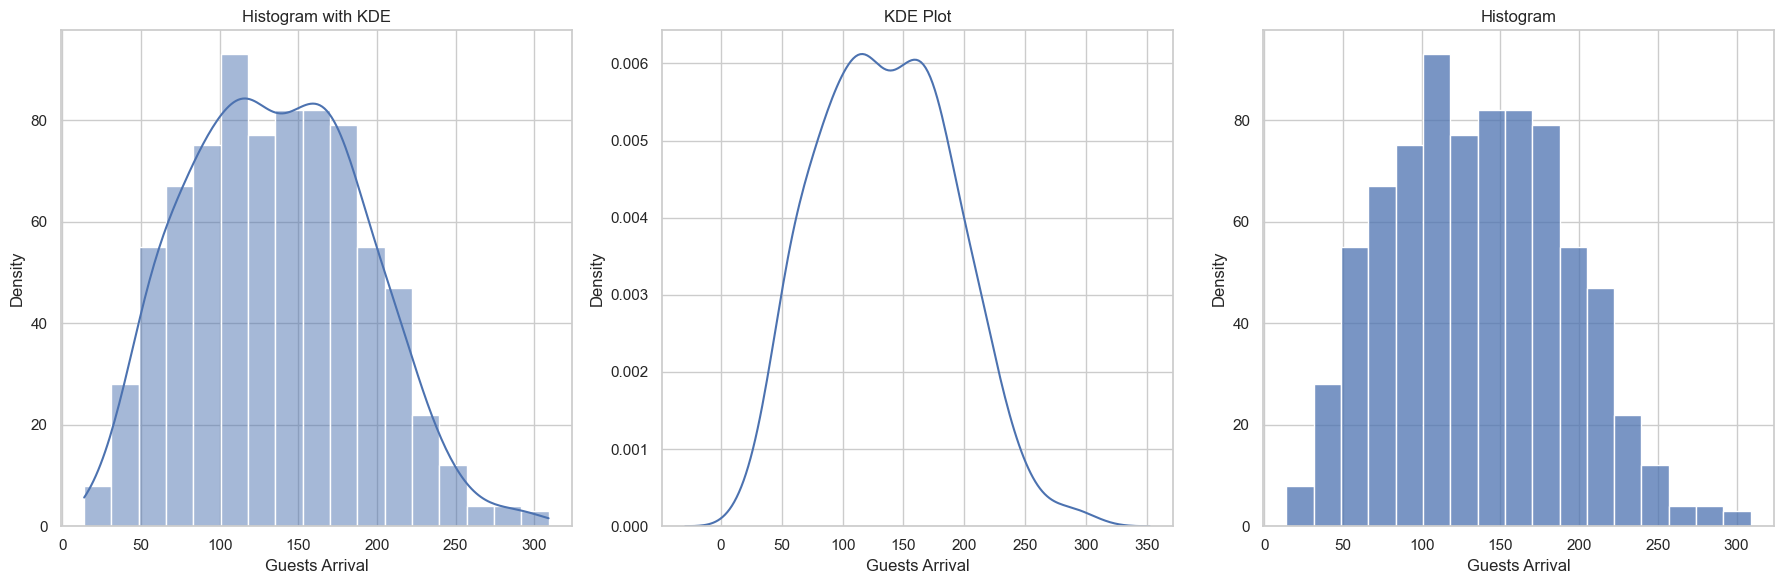

In [604]:
# Set the style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=guests_arrival, kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

sns.kdeplot(data=guests_arrival, ax=axes[1])
axes[1].set_title('KDE Plot')

sns.histplot(data=guests_arrival, ax=axes[2])
axes[2].set_title('Histogram')

for ax in axes:
    ax.set_xlabel('Guests Arrival')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

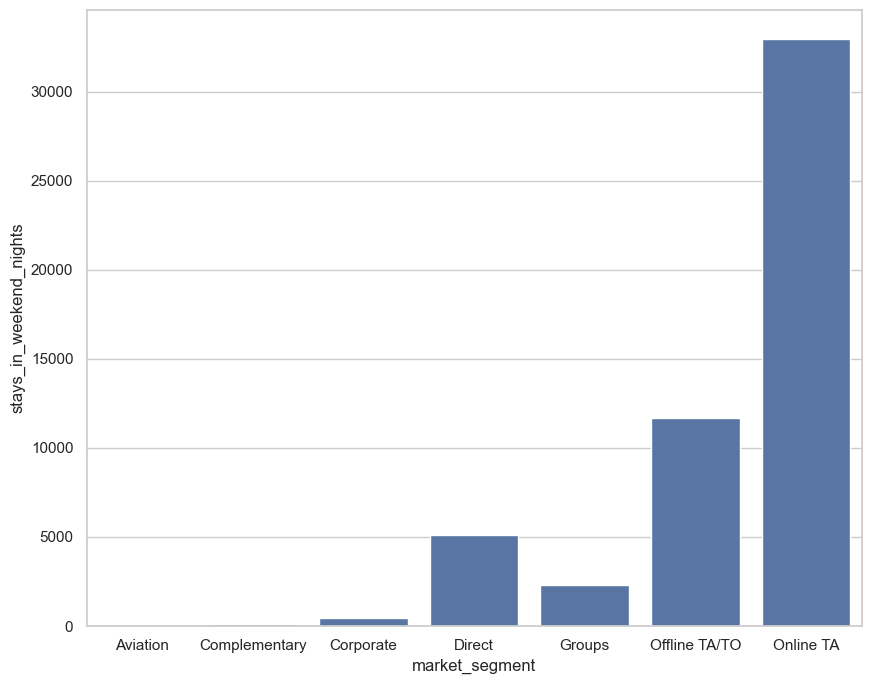

In [605]:
plt.figure(figsize=(10,8))
sns.barplot(x=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

In [606]:
pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

C:\Users\furkanbaba\AppData\Local\Temp\ipykernel_8616\1595574097.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'stay_just_weekday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Text(0, 0.5, 'Count')

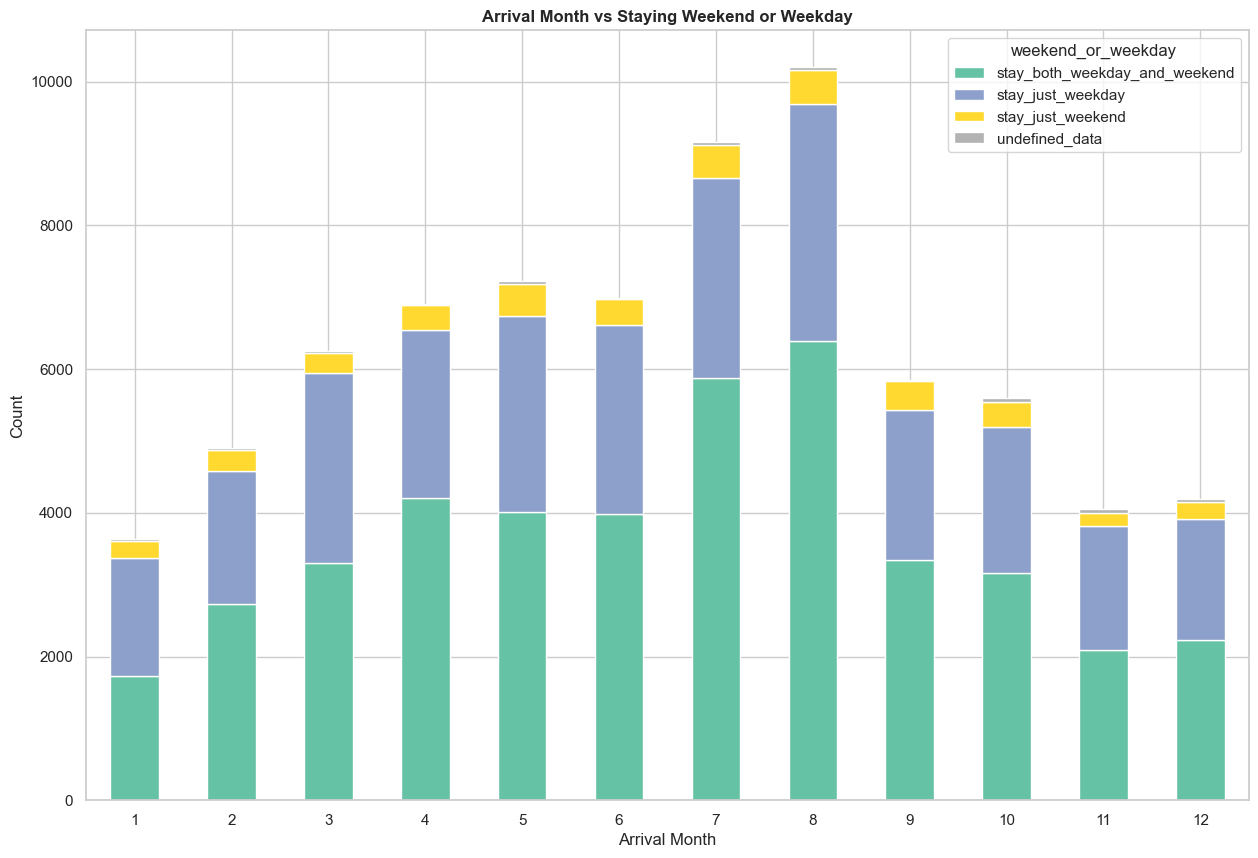

In [607]:
#`arrival_date_month` vs `weekend_or_weekday` graph

df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

In [608]:
df['total_night']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests,weekend_or_weekday,total_night
0,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-7-1,1.0,stay_just_weekday,1
1,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,2015-7-1,2.0,stay_just_weekday,2
2,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,Transient,103.00,0,1,Check-Out,2015-07-03,2015-7-1,2.0,stay_just_weekday,2
3,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,Transient,82.00,0,1,Canceled,2015-05-06,2015-7-1,2.0,stay_just_weekday,3
4,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,Transient,105.50,0,0,Canceled,2015-04-22,2015-7-1,2.0,stay_just_weekday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74951,City Hotel,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,2017-8-30,2.0,stay_both_weekday_and_weekend,7
74952,City Hotel,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,2017-8-31,3.0,stay_both_weekday_and_weekend,7
74953,City Hotel,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,2017-8-31,2.0,stay_both_weekday_and_weekend,7
74954,City Hotel,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,2017-8-31,2.0,stay_both_weekday_and_weekend,7


In [609]:
stay = df.groupby(['total_night', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_night,hotel,Number of stays
0,0,City Hotel,159
1,0,Resort Hotel,248
2,1,City Hotel,7576
3,1,Resort Hotel,3947
4,2,City Hotel,9477
...,...,...,...
62,38,Resort Hotel,1
63,42,Resort Hotel,4
64,46,Resort Hotel,1
65,48,City Hotel,1


## Data Preprocessing

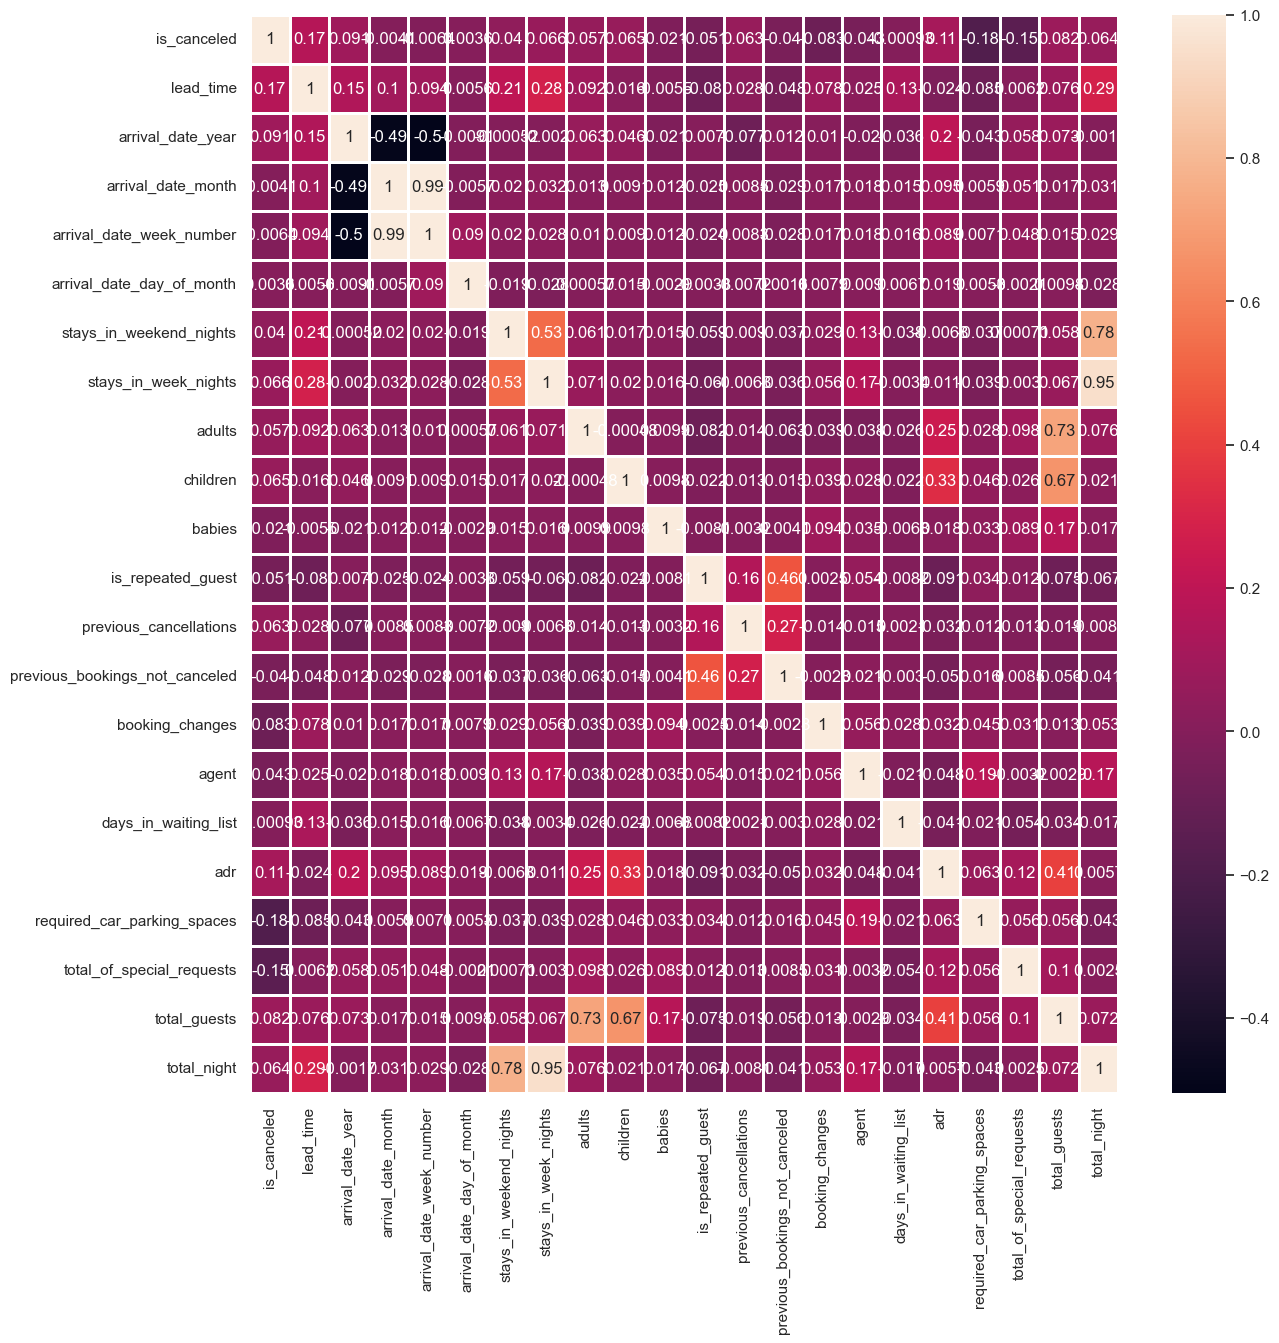

In [610]:
plt.figure(figsize = (14, 14))

corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [611]:
label = ['agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','assigned_room_type','adults','children','babies']
df.drop(labels=label,axis=1,inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,previous_bookings_not_canceled,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status,arrival_date,total_guests,weekend_or_weekday,total_night
0,Resort Hotel,0,13,2015,7,27,1,BB,GBR,Corporate,...,0,No Deposit,0,Transient,75.00,Check-Out,2015-7-1,1.0,stay_just_weekday,1
1,Resort Hotel,0,14,2015,7,27,1,BB,GBR,Online TA,...,0,No Deposit,0,Transient,98.00,Check-Out,2015-7-1,2.0,stay_just_weekday,2
2,Resort Hotel,0,9,2015,7,27,1,FB,PRT,Direct,...,0,No Deposit,0,Transient,103.00,Check-Out,2015-7-1,2.0,stay_just_weekday,2
3,Resort Hotel,1,85,2015,7,27,1,BB,PRT,Online TA,...,0,No Deposit,0,Transient,82.00,Canceled,2015-7-1,2.0,stay_just_weekday,3
4,Resort Hotel,1,75,2015,7,27,1,HB,PRT,Offline TA/TO,...,0,No Deposit,0,Transient,105.50,Canceled,2015-7-1,2.0,stay_just_weekday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74951,City Hotel,0,23,2017,8,35,30,BB,BEL,Offline TA/TO,...,0,No Deposit,0,Transient,96.14,Check-Out,2017-8-30,2.0,stay_both_weekday_and_weekend,7
74952,City Hotel,0,102,2017,8,35,31,BB,FRA,Online TA,...,0,No Deposit,0,Transient,225.43,Check-Out,2017-8-31,3.0,stay_both_weekday_and_weekend,7
74953,City Hotel,0,34,2017,8,35,31,BB,DEU,Online TA,...,0,No Deposit,0,Transient,157.71,Check-Out,2017-8-31,2.0,stay_both_weekday_and_weekend,7
74954,City Hotel,0,109,2017,8,35,31,BB,GBR,Online TA,...,0,No Deposit,0,Transient,104.40,Check-Out,2017-8-31,2.0,stay_both_weekday_and_weekend,7


In [612]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
dtype: int64

## Data transformation

In [613]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
reservation_status                 object
arrival_date                       object
total_guests                      float64
weekend_or_weekday                 object
total_night                         int64
dtype: object

In [614]:
df['distribution_channel'].nunique()

4

In [615]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
dtype: int64

In [616]:
categorical_columns = df.select_dtypes(include=["object"])

In [617]:
categorical_columns

,hotel,meal,country,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,arrival_date,weekend_or_weekday
0,Resort Hotel,BB,GBR,Corporate,Corporate,No Deposit,Transient,Check-Out,2015-7-1,stay_just_weekday
1,Resort Hotel,BB,GBR,Online TA,TA/TO,No Deposit,Transient,Check-Out,2015-7-1,stay_just_weekday
2,Resort Hotel,FB,PRT,Direct,Direct,No Deposit,Transient,Check-Out,2015-7-1,stay_just_weekday
3,Resort Hotel,BB,PRT,Online TA,TA/TO,No Deposit,Transient,Canceled,2015-7-1,stay_just_weekday
4,Resort Hotel,HB,PRT,Offline TA/TO,TA/TO,No Deposit,Transient,Canceled,2015-7-1,stay_just_weekday
...,...,...,...,...,...,...,...,...,...,...
74951,City Hotel,BB,BEL,Offline TA/TO,TA/TO,No Deposit,Transient,Check-Out,2017-8-30,stay_both_weekday_and_weekend
74952,City Hotel,BB,FRA,Online TA,TA/TO,No Deposit,Transient,Check-Out,2017-8-31,stay_both_weekday_and_weekend
74953,City Hotel,BB,DEU,Online TA,TA/TO,No Deposit,Transient,Check-Out,2017-8-31,stay_both_weekday_and_weekend
74954,City Hotel,BB,GBR,Online TA,TA/TO,No Deposit,Transient,Check-Out,2017-8-31,stay_both_weekday_and_weekend


In [618]:
df['distribution_channel'].nunique()

4

In [619]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
dtype: int64

In [620]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['distribution_channel'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [621]:
one_hot_encoded_df.index = df.index

df = pd.concat([df, one_hot_encoded_df], axis=1)

In [622]:
df = df.drop(columns=['distribution_channel'])

In [623]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
meal                              0
country                           0
market_segment                    0
previous_cancellations            0
previous_bookings_not_canceled    0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
reservation_status                0
arrival_date                      0
total_guests                      0
weekend_or_weekday                0
total_night                       0
Corporate                         0
Direct                            0
GDS                               0
TA/TO                             0
dtype: int64

In [624]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['weekend_or_weekday'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [625]:
one_hot_encoded_df.index = df.index

df = pd.concat([df, one_hot_encoded_df], axis=1)

In [626]:
df = df.drop(columns=['weekend_or_weekday', 'undefined_data'])


In [627]:
onehotencoder = OneHotEncoder()

one_hot_encoded = onehotencoder.fit_transform(df['reservation_status'].values.reshape(-1,1))

one_hot_encoded_array = one_hot_encoded.toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=onehotencoder.categories_[0])

In [628]:
one_hot_encoded_df.index = df.index
df = pd.concat([df, one_hot_encoded_df], axis=1)

In [629]:
df = df.drop(columns=['reservation_status'])

In [630]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'arrival_date', 'total_guests', 'total_night', 'Corporate', 'Direct',
       'GDS', 'TA/TO', 'stay_both_weekday_and_weekend', 'stay_just_weekday',
       'stay_just_weekend', 'Canceled', 'Check-Out', 'No-Show'],
      dtype='object')

In [631]:
df = df.drop('No-Show', axis=1)
df = df.drop('Canceled', axis=1)
df = df.drop('Check-Out', axis=1)

In [632]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'arrival_date', 'total_guests', 'total_night', 'Corporate', 'Direct',
       'GDS', 'TA/TO', 'stay_both_weekday_and_weekend', 'stay_just_weekday',
       'stay_just_weekend'],
      dtype='object')

In [633]:
le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df['hotel'] = le.fit_transform(df['hotel'])

In [634]:
df['meal'] = le.fit_transform(df['meal'])
df['market_segment'] = le.fit_transform(df['market_segment'])

In [635]:
df['deposit_type'] = le.fit_transform(df['deposit_type'])
df['customer_type'] = le.fit_transform(df['customer_type'])

In [636]:
X = df.drop(['is_canceled','arrival_date'], axis=1)
y = df['is_canceled']

In [637]:
df_numeric = df.select_dtypes(include=[np.number])

In [638]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric))

In [639]:
df_standardized.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.323819,-0.653992,-0.860687,-1.794942,0.166318,0.006227,-1.673182,-0.548041,-0.535476,-3.539413,...,-0.651117,-1.534987,-1.035219,10.336845,-0.303918,-0.048926,-3.064838,-1.161267,1.315877,-0.239554
1,1.323819,-0.653992,-0.849053,-1.794942,0.166318,0.006227,-1.673182,-0.548041,-0.535476,0.568992,...,-0.227402,-0.123078,-0.668136,-0.096741,-0.303918,-0.048926,0.326281,-1.161267,1.315877,-0.239554
2,1.323819,-0.653992,-0.907224,-1.794942,0.166318,0.006227,-1.673182,0.346380,1.186262,-2.512312,...,-0.135290,-0.123078,-0.668136,-0.096741,3.290356,-0.048926,-3.064838,-1.161267,1.315877,-0.239554
3,1.323819,1.529070,-0.023021,-1.794942,0.166318,0.006227,-1.673182,-0.548041,1.186262,0.568992,...,-0.522161,-0.123078,-0.301053,-0.096741,-0.303918,-0.048926,0.326281,-1.161267,1.315877,-0.239554
4,1.323819,1.529070,-0.139363,-1.794942,0.166318,0.006227,-1.673182,1.240800,1.186262,-0.458109,...,-0.089234,-0.123078,-0.301053,-0.096741,-0.303918,-0.048926,0.326281,-1.161267,1.315877,-0.239554


In [640]:
X_standardized = df_standardized

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [642]:
tree_regressor = DecisionTreeClassifier()
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.0


In [643]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")

Mean Squared Error on Test Set (Logistic Regression): 0.0


In [644]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (SVM): {mse}")

Mean Squared Error on Test Set (SVM): 0.00020010672358591249


In [645]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set (Random Forests): {mse}")

Mean Squared Error on Test Set (Random Forests): 0.0


In [646]:
features = StandardScaler().fit_transform(df_numeric)

In [647]:
pca = PCA()
components = pca.fit_transform(features)

In [648]:
principalDf = pd.DataFrame(data=components)

principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,6.235118,-1.046312,-1.258853,-3.658373,-0.747497,0.957452,-0.194017,2.408533,-0.535035,-2.476311,...,0.612687,-2.731495,-0.693851,0.581820,-0.736178,1.298215,0.255147,-0.009624,-0.022553,-2.517392e-14
1,-0.057852,-1.144685,-1.609269,-0.446359,-1.015570,0.263203,-1.705191,0.137937,0.366068,1.076515,...,0.505985,-0.798127,0.851365,-0.373589,0.133208,0.830584,-0.292356,-0.017405,-0.023516,-8.848721e-15
2,5.454997,-0.642947,-0.611640,0.291021,-0.509677,0.147647,-1.470407,-0.818501,1.284771,1.225452,...,0.240821,-0.397293,0.230591,-0.501171,0.120244,0.769321,-0.329492,-0.027179,-0.019735,7.729425e-15
3,-0.225377,-0.760532,-1.583844,-0.704296,0.677574,0.692252,-1.906216,-1.156485,0.950533,0.303713,...,-0.763420,-0.685785,0.530466,-0.694272,0.255522,0.787217,-0.289558,-0.021287,-0.021678,-2.836506e-15
4,0.182092,-0.758161,-1.449819,-0.461256,0.746011,0.508720,-1.203916,-0.976155,1.564312,0.252730,...,-0.240038,-0.874607,0.570678,-0.867179,0.341809,1.014356,0.592861,-0.008025,-0.016855,-1.707407e-15


In [649]:
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5)
rfecv.fit(X, y)

print(f"Mask of selected features: {rfecv.support_}")
print(f"Feature ranking: {rfecv.ranking_}")
print(f"Number of selected features: {rfecv.n_features_}")

# Get feature names
feature_names = X.columns

# Print feature names with their ranking
for rank, name in sorted(zip(rfecv.ranking_, feature_names)):
    print(f"Rank: {rank}, Feature: {name}")

X_selected = rfecv.transform(X)

Mask of selected features: [False False False False False False False False False False False False
 False False  True False False False False False False False False False]
Feature ranking: [16  2  8 10  5  3 11  4  7 15 20 12 22 13  1  9  6 24 18 23 21 17 14 19]
Number of selected features: 1
Rank: 1, Feature: adr
Rank: 2, Feature: lead_time
Rank: 3, Feature: arrival_date_day_of_month
Rank: 4, Feature: country
Rank: 5, Feature: arrival_date_week_number
Rank: 6, Feature: total_night
Rank: 7, Feature: market_segment
Rank: 8, Feature: arrival_date_year
Rank: 9, Feature: total_guests
Rank: 10, Feature: arrival_date_month
Rank: 11, Feature: meal
Rank: 12, Feature: deposit_type
Rank: 13, Feature: customer_type
Rank: 14, Feature: stay_just_weekday
Rank: 15, Feature: previous_cancellations
Rank: 16, Feature: hotel
Rank: 17, Feature: stay_both_weekday_and_weekend
Rank: 18, Feature: Direct
Rank: 19, Feature: stay_just_weekend
Rank: 20, Feature: previous_bookings_not_canceled
Rank: 21, Feature:

In [650]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X_scaled, y)


X_selected = X.columns[rfe.support_]

# Display the selected features
print("Top 3 selected features:", X_selected)

Top 3 selected features: Index(['market_segment', 'previous_cancellations',
       'previous_bookings_not_canceled'],
      dtype='object')


In [651]:
X_selected_data = X[X_selected]

# split the selected data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.2689434364994664
Accuracy on Test Set: 0.7310565635005336
Precision on Test Set: 0.5553811659192825
Recall on Test Set: 0.5472823685373398
F1 Score on Test Set: 0.5513020253728023
ROC AUC Score on Test Set: 0.67890585080794


In [652]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.2740795090715048
Accuracy on Test Set: 0.7259204909284952
Precision on Test Set: 0.6342562781712814
Recall on Test Set: 0.2176314626601856
F1 Score on Test Set: 0.32406645829906233
ROC AUC Score on Test Set: 0.5816802449933834


In [653]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set (Logistic Regression): {mse}")
print(f"Accuracy on Test Set: {accuracy}")
print(f"Precision on Test Set: {precision}")
print(f"Recall on Test Set: {recall}")
print(f"F1 Score on Test Set: {f1}")
print(f"ROC AUC Score on Test Set: {roc_auc}")

Mean Squared Error on Test Set (Logistic Regression): 0.21691568836712913
Accuracy on Test Set: 0.7830843116328708
Precision on Test Set: 0.6857142857142857
Recall on Test Set: 0.5196641626159965
F1 Score on Test Set: 0.5912518853695323
ROC AUC Score on Test Set: 0.708331985760511


In [654]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 20,  40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [655]:
# Initialize individual classifiers
classifier1 = RandomForestClassifier(random_state=42)
classifier2 = LogisticRegression(random_state=42, max_iter=1000)
classifier3 = SVC(probability=True, random_state=42)
classifier4 = DecisionTreeClassifier(random_state=42)

# Create a list of classifiers for comparison
classifiers = [('Random Forest', classifier1), ('Logistic Regression', classifier2), ('SVM', classifier3), ('Decision Tree', classifier4)]

In [656]:
# Set up K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compare models and print metrics
best_model = None
best_accuracy = 0

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [658]:
#FASTER THAN GRID SAME ACCURACY LESS FOLD LESS CV
from sklearn.model_selection import RandomizedSearchCV

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Initialize the F1 score for use in RandomizedSearchCV
f1 = make_scorer(f1_score)

# Convert param_grid to param_dist for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the model, parameter distributions, and scoring metric
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring=f1,
    cv=3,
    verbose=2,
    n_jobs=-1,
    n_iter=10  # Adjust the number of iterations based on your preferences
)
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_res, y_res)

# Get the best parameters
best_params = random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [659]:
rf = RandomForestClassifier()

# Initialize the F1 score for use in GridSearchCV
f1 = make_scorer(f1_score)

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1, cv=2, verbose=2, n_jobs=-1)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce the number of neighbors
X_res, y_res = smote.fit_resample(X_train, y_train)

# Fit GridSearchCV on the resampled data
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_

Fitting 2 folds for each of 216 candidates, totalling 432 fits


KeyboardInterrupt: 

In [660]:
# Train a new Random Forest model on the resampled data using the best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_res, y_res)

# Make predictions on the test data
predictions = best_rf.predict(X_test)

In [661]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions, zero_division=1)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 0.617482347212077
Recall: 0.5603181617322138
F1-score: 0.5875130313911735
